In [17]:
import logging
import typing

from os import getcwd, listdir
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

from indoorca.simulator.core import IndoorORCASim, IndoorOrcaSimConfig
from indoorca.environment.core import Environment
from indoorca.processing.core import MapProcessor

In [2]:
%load_ext autoreload
%autoreload 2

In [21]:
sim = IndoorORCASim(IndoorOrcaSimConfig())
pix_per_meter = 100

In [4]:

#Get maps from data/maps
maps = []
map_path = getcwd() + '/../data/maps/'
for map_name in listdir(map_path):
    im = Image.open(map_path + map_name)
    maps.append(np.asarray(im))

In [5]:
test = maps[-1]

In [6]:
test.shape

(1000, 1000)

In [7]:
env = Environment('test', test)

In [8]:
env.map.shape

(749, 581)

In [10]:
#Show the graph of the map
env.build_graph()


In [33]:
mp = MapProcessor(env.map)

In [34]:
obs = mp.get_obstacles(pix_per_meter)

In [35]:
len(obs[0])

12

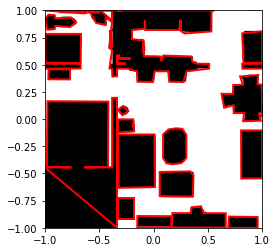

In [36]:
mp.display_map_with_polygons()

Map logic

0. Compute the single biggest connected component with Environment? probably add this to map processing
1. Get obstacle polygons
   1. pad with 0s to catch corners, check the flipping
   2. Remove 0 padding
2. Use obstacle polygons to make new map
   1. Maybe add exterior walls as obstacles?
3. Use new map to compute traversability map and graph
4. Load obstacles into ORCA
5. Use traversability map for visualization

In [ ]:
def display_binary_map(binary_map):
    plt.figure(figsize=(10, 10))
    plt.imshow(binary_map, cmap='gray', origin='lower')
    plt.xticks([])
    plt.yticks([])
    plt.show()

In [ ]:
from matplotlib.patches import Polygon as mplPolygon


def display_map_with_polygons(binary_image, polygons, polygon_color='red'):
    fig, ax = plt.subplots()

    # Display the binary map
    ax.imshow(binary_image, cmap='gray', extent=(-1, 1, -1, 1), origin='lower')

    # Plot the polygons
    for polygon in polygons:
        coords = list(polygon.exterior.coords)
        coords_tuples = [(x, y) for x, y in coords]

        # Ensure the coordinates have at least 3 points to form a valid polygon
        if len(coords_tuples) < 3:
            continue

        mpl_polygon = mplPolygon(coords_tuples, edgecolor=polygon_color, facecolor='none', linewidth=2)
        ax.add_patch(mpl_polygon)

    ax.set_xlim(-1, 1)
    ax.set_ylim(-1, 1)
    ax.set_aspect('equal', 'box')
    plt.show()